## MNIST Classification using Deep learning algorithm

<br>
<B>
This algorithm takes input as handwritten digits and convert them to digits 0-9. The data set is available in keras dataset and has about 70000 records. 
Matplotlib is used to draw visualisations for the digits.
<br>
Finally we are using seaborn's heatmap functionality to visualise our predicted output.

### Import required libraries 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


### Loading dataset.
<I> The data set is divided in train and test. So we need not split it.

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

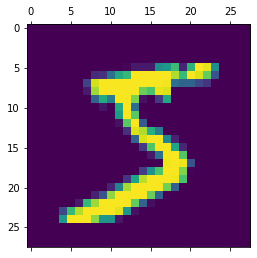

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

### Feature Scaling

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Creating keras sequential model with one layer only and selecting optimizer. 
<b> Fit data to model by selecting some number for epochs.

In [11]:
model=keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.7080 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3056 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2548 - accuracy: 0.9290


### Evaluation of model

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 3ms/step - loss: 0.2670 - accuracy: 0.9260


[0.26702263951301575, 0.9259999990463257]

In [13]:
y_predicted=model.predict(X_test)
y_predicted[0]

array([3.5096109e-02, 4.5036484e-07, 6.5132678e-02, 9.5965779e-01,
       1.8680096e-03, 1.0989654e-01, 1.4622315e-06, 9.9972510e-01,
       9.3499720e-02, 6.6175413e-01], dtype=float32)

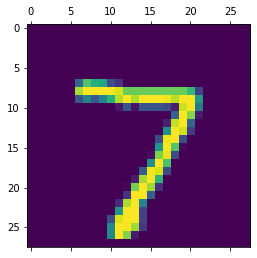

In [14]:
plt.matshow(X_test[0])

In [15]:
np.argmax(y_predicted[0])

7

### Changing predicted output values to required format 

In [16]:
y_predicted= [np.argmax(i) for i in y_predicted]

In [17]:
y_predicted[1]

2

### Creating confusion matrix using tensorflow function

In [18]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [19]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [  10,   10,  924,   14,    8,    2,   13,   10,   37,    4],
       [   4,    0,   18,  923,    0,   22,    3,   11,   22,    7],
       [   2,    1,    4,    1,  918,    0,    9,    4,   10,   33],
       [  12,    3,    3,   35,    8,  775,   15,    5,   30,    6],
       [  16,    3,    6,    1,    7,   14,  907,    2,    2,    0],
       [   3,    6,   21,   10,    9,    0,    0,  953,    1,   25],
       [  11,    7,    7,   25,    9,   20,   10,   12,  867,    6],
       [  13,    7,    1,   11,   28,    6,    0,   26,    6,  911]])>

### Visualize results using seaborn heatmap.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

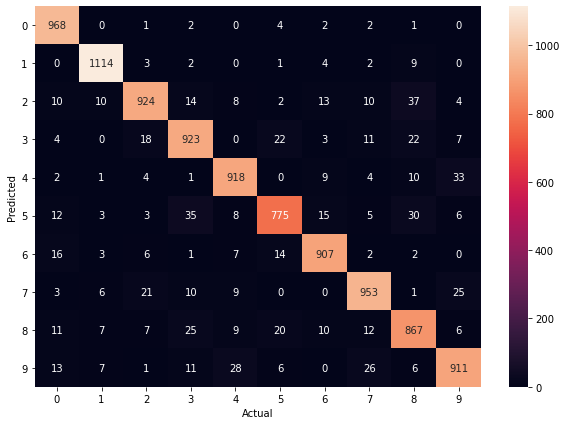

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.yticks(rotation=0)

### Phase2: Initialize model- changed hyperparameters as: 2 layers using relu activation function at first layer and sigmoid at outer layer. 

In [21]:
model=keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4604 - accuracy: 0.8707
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9594
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0913 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9848


### Predicting y from phase 2 trainings and evaluate the results

In [22]:
y_predicted1=model.predict(X_test)

In [23]:
y_predicted1[0]

array([2.8680593e-01, 1.2859702e-04, 3.7651813e-01, 9.6461678e-01,
       4.5507477e-05, 2.8044254e-02, 5.4833443e-08, 9.9997604e-01,
       2.1356353e-01, 5.1542598e-01], dtype=float32)

In [24]:
np.argmax(y_predicted1[0])

7

In [25]:
y_predicted1= [np.argmax(i) for i in y_predicted1]

In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0755 - accuracy: 0.9759


[0.07545841485261917, 0.9758999943733215]

### Confusion matrix for phase 2.

In [27]:
cm=tf.math.confusion_matrix(y_test,y_predicted1)

In [28]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    1,    4,    4,    1,    3,    0],
       [   0, 1121,    2,    4,    0,    1,    3,    0,    4,    0],
       [   5,    3, 1006,    4,    1,    0,    3,    6,    4,    0],
       [   0,    1,    2,  993,    0,    7,    0,    3,    2,    2],
       [   0,    0,    2,    0,  962,    1,    6,    3,    1,    7],
       [   2,    0,    0,    8,    1,  874,    4,    1,    1,    1],
       [   4,    3,    1,    1,    4,    5,  938,    0,    2,    0],
       [   0,    5,    7,    8,    1,    0,    0, 1000,    0,    7],
       [   1,    0,    2,   16,    2,   10,    2,    4,  933,    4],
       [   2,    4,    0,    9,    8,   10,    0,    5,    4,  967]])>

### Visualization for phase 2 trainings

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

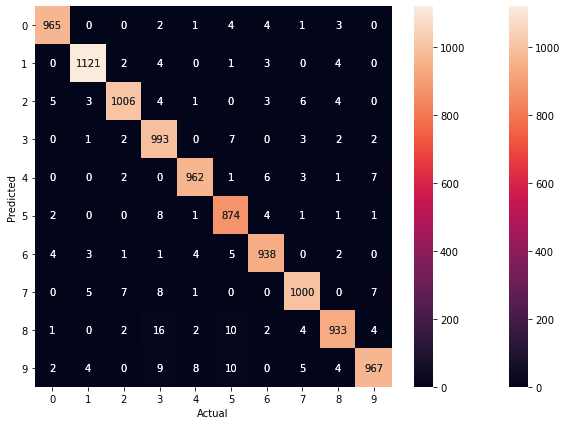

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.yticks(rotation=0)

In [30]:
plt.savefig("MNIST Seaborn Heatmap.jpg")

<Figure size 432x288 with 0 Axes>